## Retrieve data using Spark

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=ea28d647b9e4200dcc3b2b8fb6bdd78e7f74dc174ab812d99a24420b0b5f3664
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [2]:
!pip install findspark

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
#Dependencies
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
#Importing packeges to retrive data from  spark
from pyspark import SparkFiles
from pyspark.sql import SparkSession
from pathlib import Path
import time
import findspark
findspark.init()

In [6]:
!ls "/content/drive/My Drive/"

'2022 New Hire Packet.gdoc'	 excel-challenge
'2022 New Hire Packet.pdf'	'LOR AMANDA RESUME.pptx'
 20240824_014026.jpg		'Project 4'
'AMANDA LOR RESUME.pdf'		 STEP_1___CVSA_Questionnaire_07_19_24.pdf
'Colab Notebooks'		 UCF
 CV.gdoc			 Untitled0.ipynb
'Document sans titre (1).gdoc'	 Untitled1.ipynb
'Document sans titre.gdoc'


In [7]:
data0 = pd.read_csv('/content/drive/My Drive/Project 4/Resources/movies_dataset_0.csv')
data0.head()

,imdb_id,title,runtime,overview,rated,imdb_votes,popularity,imdb_rating,rotten_tomatoes_rating,metacritic_rating,...,star_1,star_2,star_3,genre_1,genre_2,genre_3,director_1,director_2,release_year,outcome
0,tt0094721,Beetlejuice,92 min,A newly dead New England couple seeks help fro...,PG,"348,874",941.557,7.5,86.0,70.0,...,Alec Baldwin,Geena Davis,Michael Keaton,Comedy,Fantasy,NaN,Tim Burton,NaN,1988,True
1,tt27682129,Prey,100 min,A young couple is compelled to leave their Chr...,R,"233,550",436.919,7.1,94.0,71.0,...,Amber Midthunder,Dakota Beavers,Dane DiLiegro,Action,Adventure,Horror,Dan Trachtenberg,NaN,2024,False
2,tt0295701,xXx,124 min,Xander Cage is your standard adrenaline junkie...,PG-13,"187,525",369.083,5.8,48.0,48.0,...,Vin Diesel,Asia Argento,Marton Csokas,Action,Adventure,Thriller,Rob Cohen,NaN,2002,False
3,tt4154756,Avengers: Infinity War,149 min,As the Avengers and their allies have continue...,PG-13,"1,226,533",270.163,8.4,85.0,68.0,...,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,Action,Adventure,Sci-Fi,Anthony Russo,Joe Russo,2018,True
4,tt23778968,Thelma,116 min,When 93-year-old Thelma Post gets duped by a p...,Not Rated,"37,145",263.208,7.0,92.0,74.0,...,Eili Harboe,Kaya Wilkins,Henrik Rafaelsen,Drama,Fantasy,Horror,Joachim Trier,NaN,2024,True


In [8]:
data1 = pd.read_csv('/content/drive/My Drive/Project 4/Resources/movies_dataset_1.csv')
data1.head()

,imdb_id,title,runtime,overview,rated,imdb_votes,popularity,imdb_rating,rotten_tomatoes_rating,metacritic_rating,...,star_1,star_2,star_3,genre_1,genre_2,genre_3,director_1,director_2,release_year,outcome
0,tt10838180,The Matrix Resurrections,148 min,"Plagued by strange memories, Neo's life takes ...",R,"284,577",54.068,5.7,63.0,63.0,...,Keanu Reeves,Carrie-Anne Moss,Yahya Abdul-Mateen II,Action,Sci-Fi,NaN,Lana Wachowski,NaN,2021,False
1,tt1192628,Rango,107 min,"When Rango, a lost family pet, accidentally wi...",PG,"296,553",52.110,7.3,88.0,75.0,...,Johnny Depp,Isla Fisher,Timothy Olyphant,Animation,Action,Adventure,Gore Verbinski,NaN,2011,True
2,tt15679400,Knock at the Cabin,100 min,"While vacationing at a remote cabin, a young g...",R,"121,112",53.974,6.1,67.0,63.0,...,Dave Bautista,Jonathan Groff,Ben Aldridge,Horror,Mystery,Thriller,M. Night Shyamalan,NaN,2023,True
3,tt1302011,Kung Fu Panda 2,90 min,Po and his friends fight to stop a peacock vil...,PG,"326,509",50.094,7.3,81.0,67.0,...,Jack Black,Angelina Jolie,Jackie Chan,Animation,Action,Adventure,Jennifer Yuh Nelson,NaN,2011,True
4,tt27155038,"Ruby Gillman, Teenage Kraken",91 min,"Ruby Gillman, a sweet and awkward high school ...",PG,"11,541",53.797,5.7,65.0,50.0,...,Jane Fonda,Lana Condor,Toni Collette,Animation,Action,Comedy,Kirk DeMicco,Faryn Pearl,2023,False


In [9]:
data2 = pd.read_csv('/content/drive/My Drive/Project 4/Resources/movies_dataset_2.csv')
data2.head()

,imdb_id,title,runtime,overview,rated,imdb_votes,popularity,imdb_rating,rotten_tomatoes_rating,metacritic_rating,...,star_1,star_2,star_3,genre_1,genre_2,genre_3,director_1,director_2,release_year,outcome
0,tt2011159,No Good Deed,84 min,"Terri is a devoted wife and mother of two, liv...",PG-13,"22,194",37.883,5.6,12.0,26.0,...,Taraji P. Henson,Idris Elba,Leslie Bibb,Crime,Drama,Horror,Sam Miller,NaN,2014,False
1,tt3110958,Now You See Me 2,129 min,One year after outwitting the FBI and winning ...,PG-13,"325,510",33.684,6.4,33.0,46.0,...,Jesse Eisenberg,Mark Ruffalo,Woody Harrelson,Action,Adventure,Comedy,Jon M. Chu,NaN,2016,False
2,tt0493464,Wanted,110 min,Doormat Wesley Gibson is an office worker whos...,R,"411,856",37.809,6.7,71.0,64.0,...,Angelina Jolie,James McAvoy,Morgan Freeman,Action,Crime,Thriller,Timur Bekmambetov,NaN,2008,True
3,tt2024544,12 Years a Slave,134 min,"In the pre-Civil War United States, Solomon No...",R,"747,876",37.780,8.1,95.0,96.0,...,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Biography,Drama,History,Steve McQueen,NaN,2013,True
4,tt1615918,Alvin and the Chipmunks: Chipwrecked,87 min,"Playing around while aboard a cruise ship, the...",G,"40,342",37.673,4.4,10.0,24.0,...,Justin Long,Matthew Gray Gubler,Jesse McCartney,Adventure,Comedy,Family,Mike Mitchell,NaN,2011,False


In [10]:
data3 = pd.read_csv('/content/drive/My Drive/Project 4/Resources/movies_dataset_3.csv')
data3.head()

,imdb_id,title,runtime,overview,rated,imdb_votes,popularity,imdb_rating,rotten_tomatoes_rating,metacritic_rating,...,star_1,star_2,star_3,genre_1,genre_2,genre_3,director_1,director_2,release_year,outcome
0,tt0209144,Memento,113 min,Leonard Shelby is tracking down the man who ra...,R,"1,337,799",29.914,8.4,94.0,83.0,...,Guy Pearce,Carrie-Anne Moss,Joe Pantoliano,Mystery,Thriller,NaN,Christopher Nolan,NaN,2000,True
1,tt10016180,The Little Things,128 min,"Deputy Sheriff Joe ""Deke"" Deacon joins forces ...",R,"129,573",24.000,6.3,45.0,54.0,...,Denzel Washington,Rami Malek,Jared Leto,Crime,Drama,Mystery,John Lee Hancock,NaN,2021,False
2,tt0286106,Signs,106 min,A family living on a farm finds mysterious cro...,PG-13,"391,430",24.487,6.8,75.0,59.0,...,Mel Gibson,Joaquin Phoenix,Rory Culkin,Drama,Mystery,Sci-Fi,M. Night Shyamalan,NaN,2002,False
3,tt0497972,Sex and Death 101,117 min,"A guy's life is turned around by an email, whi...",R,"11,624",29.904,5.9,25.0,24.0,...,Robert Wisdom,Tanc Sade,Patton Oswalt,Comedy,Drama,Fantasy,Daniel Waters,NaN,2007,False
4,tt0970411,City of Ember,90 min,"For generations, the people of the City of Emb...",PG,"70,313",29.899,6.4,53.0,58.0,...,Saoirse Ronan,Toby Jones,Bill Murray,Adventure,Drama,Family,Gil Kenan,NaN,2008,False


In [11]:
# Initialize Spark session
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()
#Define Path
data0 = Path('/content/drive/My Drive/Project 4/Resources/movies_dataset_0.csv').resolve()
data1 = Path('/content/drive/My Drive/Project 4/Resources/movies_dataset_1.csv').resolve()
data2 = Path('/content/drive/My Drive/Project 4/Resources/movies_dataset_2.csv').resolve()
data3 = Path('/content/drive/My Drive/Project 4/Resources/movies_dataset_3.csv').resolve()

# Read the CSV file using the absolute path
df0 = spark.read.csv(
    str(data0),
    sep=",",
    header=True,
    inferSchema=True,
    quote='"',    # Handles quoted strings
    escape='"',   # Escape character for embedded quotes
    multiLine=True  # Handles multiline fields in case of long text
)

df1 = spark.read.csv(
    str(data1),
    sep=",",
    header=True,
    inferSchema=True,
    quote='"',
    escape='"',
    multiLine=True
)
df2 = spark.read.csv(
    str(data2),
    sep=",",
    header=True,
    inferSchema=True,
    quote='"',
    escape='"',
    multiLine=True
)
df3 = spark.read.csv(
    str(data3),
    sep=",",
    header=True,
    inferSchema=True,
    quote='"',
    escape='"',
    multiLine=True
)
# #Merge the Dataframes using union
merged_df = df0.union(df1).union(df2).union(df3)
merged_df.show()

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


+----------+--------------------+-------+--------------------+---------+----------+----------+-----------+----------------------+-----------------+---------+----------+-----------------+-------------------+--------------------+--------------------+---------+----------+----------+------------------+--------------------+------------+-------+
|   imdb_id|               title|runtime|            overview|    rated|imdb_votes|popularity|imdb_rating|rotten_tomatoes_rating|metacritic_rating|   budget|   revenue|financial_success|             star_1|              star_2|              star_3|  genre_1|   genre_2|   genre_3|        director_1|          director_2|release_year|outcome|
+----------+--------------------+-------+--------------------+---------+----------+----------+-----------+----------------------+-----------------+---------+----------+-----------------+-------------------+--------------------+--------------------+---------+----------+----------+------------------+-----------------

In [12]:
# Create our temporary view
merged_df.createOrReplaceTempView('movies')

In [13]:
#
spark.sql("""
SELECT star_1,
       count(*) AS number_of_stars
FROM movies
GROUP BY star_1
ORDER BY number_of_stars DESC
""").show(20)


+--------------------+---------------+
|              star_1|number_of_stars|
+--------------------+---------------+
|           Tom Hanks|             23|
|        Adam Sandler|             23|
|          Tom Cruise|             22|
|       Mark Wahlberg|             21|
|  Sylvester Stallone|             21|
|        Nicolas Cage|             20|
|        Keanu Reeves|             19|
|      Dwayne Johnson|             18|
|Arnold Schwarzene...|             17|
|         Johnny Depp|             17|
|   Denzel Washington|             16|
|        Bruce Willis|             16|
|          Will Smith|             16|
|   Leonardo DiCaprio|             15|
|          Jim Carrey|             15|
|         Ben Affleck|             14|
|       Ryan Reynolds|             13|
|      Robert De Niro|             13|
|           Brad Pitt|             13|
|     Jake Gyllenhaal|             12|
+--------------------+---------------+
only showing top 20 rows



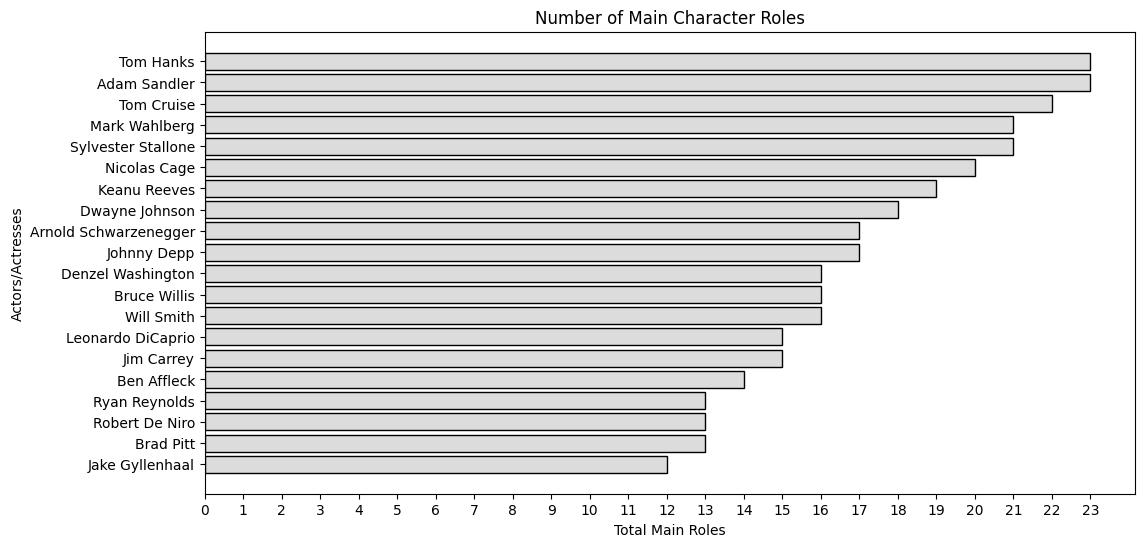

In [114]:
# Marisol's code of Data for the top 20 actors and their star counts
import numpy as np
actors = [
    "Tom Hanks", "Adam Sandler", "Tom Cruise", "Mark Wahlberg",
    "Sylvester Stallone", "Nicolas Cage", "Keanu Reeves",
    "Dwayne Johnson", "Arnold Schwarzenegger", "Johnny Depp",
    "Denzel Washington", "Bruce Willis", "Will Smith",
    "Leonardo DiCaprio", "Jim Carrey", "Ben Affleck",
    "Ryan Reynolds", "Robert De Niro", "Brad Pitt",
    "Jake Gyllenhaal"
]
total_stars = [
    23, 23, 22, 21, 21, 20, 19, 18,
    17, 17, 16, 16, 16, 15, 15, 14,
    13, 13, 13, 12
]
# Create the bar chart
plt.figure(figsize=(12, 6))
plt.barh(actors, total_stars, color='gainsboro', edgecolor='black')
plt.xlabel('Total Main Roles')
plt.ylabel('Actors/Actresses')
plt.title('Number of Main Character Roles')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest stars on top
# plt.cm.plasma
# Add more tick marks
max_stars = max(total_stars)
plt.xticks(np.arange(0, max_stars + 1, 1))
plt.show()

In [14]:
spark.sql("""
SELECT title,
        imdb_rating
FROM movies
ORDER BY imdb_rating DESC
""").show(truncate=False)


+-------------------------------------------------+-----------+
|title                                            |imdb_rating|
+-------------------------------------------------+-----------+
|The Shawshank Redemption                         |9.3        |
|The Godfather                                    |9.2        |
|The Dark Knight                                  |9.0        |
|The Lord of the Rings: The Return of the King    |9.0        |
|The Godfather Part II                            |9.0        |
|Schindler's List                                 |9.0        |
|12 Angry Men                                     |9.0        |
|The Lord of the Rings: The Fellowship of the Ring|8.9        |
|Pulp Fiction                                     |8.9        |
|The Lord of the Rings: The Two Towers            |8.8        |
|Fight Club                                       |8.8        |
|Forrest Gump                                     |8.8        |
|Inception                              

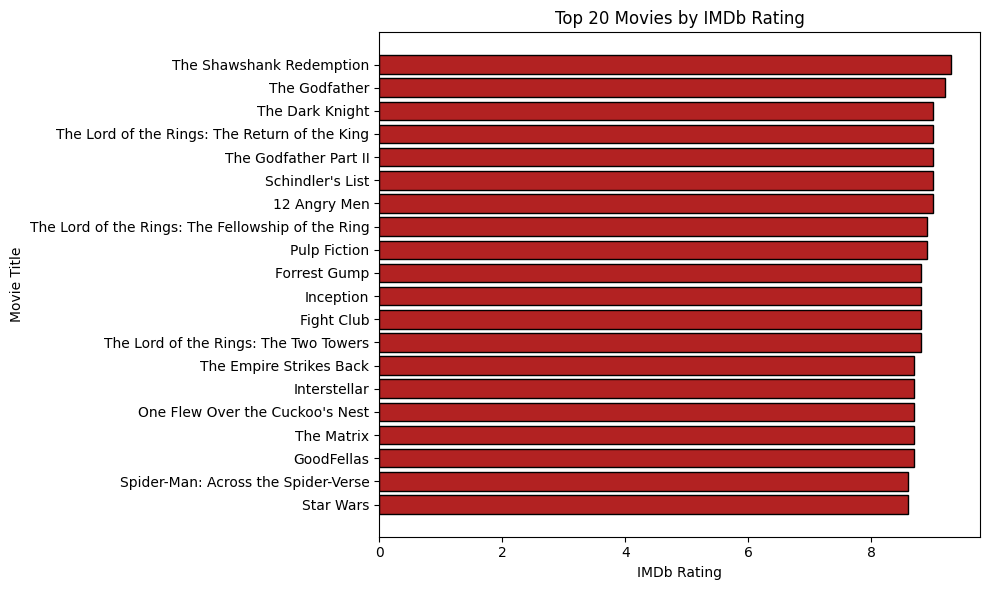

In [111]:
# Sample data
data = {
    'title': [
        'The Shawshank Redemption', 'The Godfather', 'The Dark Knight',
        'The Lord of the Rings: The Return of the King', 'The Godfather Part II',
        "Schindler's List", '12 Angry Men',
        'The Lord of the Rings: The Fellowship of the Ring', 'Pulp Fiction',
        'The Lord of the Rings: The Two Towers', 'Fight Club', 'Forrest Gump',
        'Inception', 'The Empire Strikes Back', 'Interstellar',
        'One Flew Over the Cuckoo\'s Nest', 'The Matrix', 'GoodFellas',
        'Spider-Man: Across the Spider-Verse', 'Star Wars'
    ],
    'imdb_rating': [
        9.3, 9.2, 9.0, 9.0, 9.0, 9.0, 9.0, 8.9, 8.9, 8.8,
        8.8, 8.8, 8.8, 8.7, 8.7, 8.7, 8.7, 8.7, 8.6, 8.6
    ]
}

df = pd.DataFrame(data)

# Sort by IMDb rating
df = df.sort_values(by='imdb_rating', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['title'], df['imdb_rating'], color='firebrick', edgecolor='black')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies by IMDb Rating')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [15]:
spark.sql("""
SELECT title,
        imdb_rating
FROM movies
ORDER BY imdb_rating ASC
""").show(truncate=False)

+---------------------------------------+-----------+
|title                                  |imdb_rating|
+---------------------------------------+-----------+
|Son of the Mask                        |2.3        |
|Cosmic Sin                             |2.5        |
|Dragonball Evolution                   |2.5        |
|Meet the Spartans                      |2.8        |
|Winnie the Pooh: Blood and Honey       |2.9        |
|Left Behind                            |3.1        |
|Jack and Jill                          |3.3        |
|The Emoji Movie                        |3.4        |
|Fifty Shades of Black                  |3.5        |
|Dance Flick                            |3.6        |
|Mortal Kombat: Annihilation            |3.6        |
|Jaws 3-D                               |3.7        |
|Superman IV: The Quest for Peace       |3.7        |
|Exorcist II: The Heretic               |3.8        |
|The Adventures of Sharkboy and Lavagirl|3.8        |
|Batman & Robin             

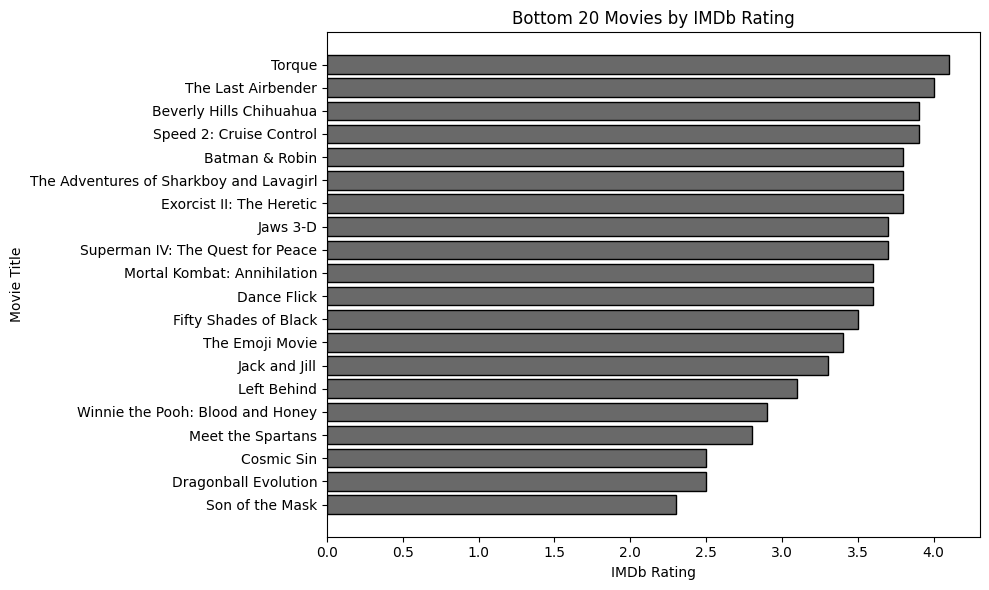

In [112]:
# Sample data
data = {
    'title': [
        'Son of the Mask','Cosmic Sin','Dragonball Evolution','Meet the Spartans',
        'Winnie the Pooh: Blood and Honey','Left Behind','Jack and Jill','The Emoji Movie',
        'Fifty Shades of Black','Dance Flick','Mortal Kombat: Annihilation','Jaws 3-D',
        'Superman IV: The Quest for Peace','Exorcist II: The Heretic',
        'The Adventures of Sharkboy and Lavagirl','Batman & Robin',
        'Speed 2: Cruise Control','Beverly Hills Chihuahua',
        'The Last Airbender','Torque'
    ],
    'imdb_rating': [
        2.3,2.5,2.5,2.8,2.9,3.1,3.3,3.4,3.5,3.6,3.6,3.7,3.7,3.8,3.8,3.8,3.9,3.9,4.0,4.1
    ]
}

df = pd.DataFrame(data)

# Sort by IMDb rating
df = df.sort_values(by='imdb_rating', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['title'], df['imdb_rating'], color='dimgrey', edgecolor='black')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')
plt.title('Bottom 20 Movies by IMDb Rating')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [16]:
#how many movies do we have per IMDB_Rating
spark.sql("""
SELECT imdb_rating, COUNT(*) AS number_of_movies
FROM movies
GROUP BY imdb_rating
ORDER BY number_of_movies DESC
""").show(20)


+-----------+----------------+
|imdb_rating|number_of_movies|
+-----------+----------------+
|        6.5|              97|
|        6.6|              96|
|        6.3|              94|
|        7.3|              93|
|        6.4|              87|
|        6.7|              79|
|        7.0|              79|
|        7.2|              76|
|        7.1|              74|
|        6.2|              71|
|        7.4|              68|
|        6.1|              68|
|        6.9|              68|
|        7.6|              66|
|        7.5|              65|
|        6.8|              65|
|        7.8|              57|
|        7.7|              56|
|        5.8|              55|
|        5.9|              48|
+-----------+----------------+
only showing top 20 rows



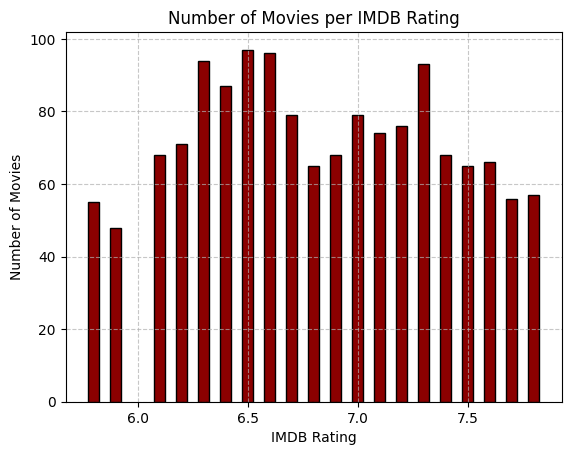

In [47]:
# Data from the table
imdb_ratings = [6.5, 6.6, 6.3, 7.3, 6.4, 6.7, 7.0, 7.2, 7.1, 6.2, 7.4, 6.1, 6.9, 7.6, 7.5, 6.8, 7.8, 7.7, 5.8, 5.9]
number_of_movies = [97, 96, 94, 93, 87, 79, 79, 76, 74, 71, 68, 68, 68, 66, 65, 65, 57, 56, 55, 48]

# Create the bar plot
plt.bar(imdb_ratings, number_of_movies, width=0.05, color= 'darkred', edgecolor='black')

# Add labels and title
plt.xlabel("IMDB Rating")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per IMDB Rating")

# Add a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [51]:
#Movies with financial success
financial_success = spark.sql("""
SELECT title, revenue, budget
FROM movies
WHERE financial_success = true
ORDER BY  revenue  DESC
""").show(truncate=False)

+------------------------------+----------+---------+
|title                         |revenue   |budget   |
+------------------------------+----------+---------+
|Avatar                        |2923706026|237000000|
|Avengers: Endgame             |2799439100|356000000|
|Avatar: The Way of Water      |2320250281|460000000|
|Titanic                       |2264162353|200000000|
|Avengers: Infinity War        |2052415039|300000000|
|Spider-Man: No Way Home       |1921847111|200000000|
|Jurassic World                |1671537444|150000000|
|The Lion King                 |1663000000|260000000|
|The Avengers                  |1518815515|220000000|
|Furious 7                     |1515400000|190000000|
|Top Gun: Maverick             |1488732821|170000000|
|Frozen II                     |1453683476|150000000|
|Barbie                        |1445638421|145000000|
|Avengers: Age of Ultron       |1405403694|365000000|
|The Super Mario Bros. Movie   |1362000000|100000000|
|Black Panther              

In [81]:
#Amount of movies per genre
spark.sql("""
SELECT genre_1 AS genre, COUNT(*) AS number_of_movies
FROM movies
GROUP BY genre_1
UNION ALL
SELECT genre_2 AS genre, COUNT(*) AS number_of_movies
FROM movies
GROUP BY genre_2
UNION ALL
SELECT genre_3 AS genre, COUNT(*) AS number_of_movies
FROM movies
GROUP BY genre_3
ORDER BY number_of_movies DESC
""").show(10)


+----------+----------------+
|     genre|number_of_movies|
+----------+----------------+
|    Action|             769|
| Adventure|             527|
|      NULL|             511|
|     Drama|             357|
|    Comedy|             304|
|  Thriller|             284|
|     Drama|             254|
| Animation|             225|
|    Sci-Fi|             201|
|    Comedy|             200|
+----------+----------------+
only showing top 10 rows



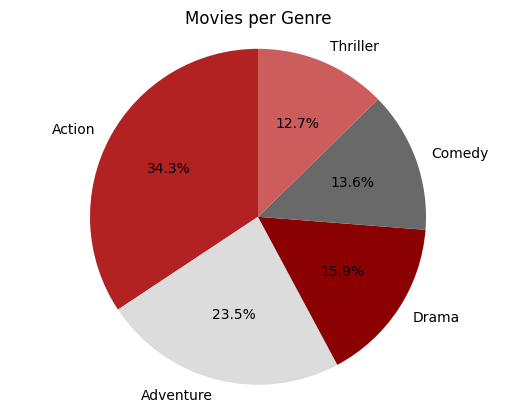

In [93]:
genres = ['Action', 'Adventure', 'Drama', 'Comedy', 'Thriller']
counts = [769, 527, 357, 304, 284]

plt.pie(counts, labels=genres, autopct='%1.1f%%', startangle=90, colors=['firebrick','gainsboro','darkred','dimgrey','indianred'])
plt.axis('equal')  # Ensure a circular pie chart
plt.title('Movies per Genre')
plt.show()

## Clean, normalize, and standardize data before modeling

In [20]:
# Converting merged df from Spark into a Pandas DataFrame
movies_df = merged_df.toPandas()
movies_df.head()

,imdb_id,title,runtime,overview,rated,imdb_votes,popularity,imdb_rating,rotten_tomatoes_rating,metacritic_rating,...,star_1,star_2,star_3,genre_1,genre_2,genre_3,director_1,director_2,release_year,outcome
0,tt0094721,Beetlejuice,92 min,A newly dead New England couple seeks help fro...,PG,"348,874",941.557,7.5,86.0,70.0,...,Alec Baldwin,Geena Davis,Michael Keaton,Comedy,Fantasy,None,Tim Burton,None,1988,True
1,tt27682129,Prey,100 min,A young couple is compelled to leave their Chr...,R,"233,550",436.919,7.1,94.0,71.0,...,Amber Midthunder,Dakota Beavers,Dane DiLiegro,Action,Adventure,Horror,Dan Trachtenberg,None,2024,False
2,tt0295701,xXx,124 min,Xander Cage is your standard adrenaline junkie...,PG-13,"187,525",369.083,5.8,48.0,48.0,...,Vin Diesel,Asia Argento,Marton Csokas,Action,Adventure,Thriller,Rob Cohen,None,2002,False
3,tt4154756,Avengers: Infinity War,149 min,As the Avengers and their allies have continue...,PG-13,"1,226,533",270.163,8.4,85.0,68.0,...,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,Action,Adventure,Sci-Fi,Anthony Russo,Joe Russo,2018,True
4,tt23778968,Thelma,116 min,When 93-year-old Thelma Post gets duped by a p...,Not Rated,"37,145",263.208,7.0,92.0,74.0,...,Eili Harboe,Kaya Wilkins,Henrik Rafaelsen,Drama,Fantasy,Horror,Joachim Trier,None,2024,True


In [21]:
#Checking columns
movies_df.columns

Index(['imdb_id', 'title', 'runtime', 'overview', 'rated', 'imdb_votes',
       'popularity', 'imdb_rating', 'rotten_tomatoes_rating',
       'metacritic_rating', 'budget', 'revenue', 'financial_success', 'star_1',
       'star_2', 'star_3', 'genre_1', 'genre_2', 'genre_3', 'director_1',
       'director_2', 'release_year', 'outcome'],
      dtype='object')

In [22]:
#Dropping unncesary columns for the model
movies_df.drop([
    'imdb_id','title', 'overview','imdb_votes','popularity',
    'imdb_rating', 'rotten_tomatoes_rating', 'metacritic_rating',
      'revenue','financial_success',

     ], axis=1, inplace=True)

In [23]:
#Checking data types
movies_df.dtypes

,0
runtime,object
rated,object
budget,int32
star_1,object
star_2,object
star_3,object
genre_1,object
genre_2,object
genre_3,object
director_1,object


In [24]:
#Organizing columns names and coverting the 'outcome' column into a boolean
movies_df = movies_df[['release_year','runtime', 'rated','budget', 'star_1', 'star_2', 'star_3', 'genre_1','genre_2','genre_3', 'director_1','director_2','outcome']]
movies_df['outcome'] = movies_df['outcome'].astype(int)
movies_df.head(3)

,release_year,runtime,rated,budget,star_1,star_2,star_3,genre_1,genre_2,genre_3,director_1,director_2,outcome
0,1988,92 min,PG,15000000,Alec Baldwin,Geena Davis,Michael Keaton,Comedy,Fantasy,None,Tim Burton,None,1
1,2024,100 min,R,0,Amber Midthunder,Dakota Beavers,Dane DiLiegro,Action,Adventure,Horror,Dan Trachtenberg,None,0
2,2002,124 min,PG-13,70000000,Vin Diesel,Asia Argento,Marton Csokas,Action,Adventure,Thriller,Rob Cohen,None,0


In [25]:
#Extracting the string(min) from the 'runtime' column
def runtime_cleaner (string):
    minutes = string.split(" ")[0]
    return int(minutes)

movies_df['runtime'] = movies_df['runtime'].map(runtime_cleaner)
movies_df.head(3)

,release_year,runtime,rated,budget,star_1,star_2,star_3,genre_1,genre_2,genre_3,director_1,director_2,outcome
0,1988,92,PG,15000000,Alec Baldwin,Geena Davis,Michael Keaton,Comedy,Fantasy,None,Tim Burton,None,1
1,2024,100,R,0,Amber Midthunder,Dakota Beavers,Dane DiLiegro,Action,Adventure,Horror,Dan Trachtenberg,None,0
2,2002,124,PG-13,70000000,Vin Diesel,Asia Argento,Marton Csokas,Action,Adventure,Thriller,Rob Cohen,None,0


In [26]:
# Identify categorical columns
movies_categorical = movies_df.select_dtypes(include=["object"]).columns.tolist()

In [27]:
#Checking my categorical columns
movies_categorical

['rated',
 'star_1',
 'star_2',
 'star_3',
 'genre_1',
 'genre_2',
 'genre_3',
 'director_1',
 'director_2']

In [28]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(movies_df[movies_categorical]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names_out(movies_categorical)

# Display the first few rows of the encoded DataFrame
encode_df.head()

,rated_Approved,rated_G,rated_GP,rated_N/A,rated_NC-17,rated_Not Rated,rated_PG,rated_PG-13,rated_Passed,rated_R,...,director_2_ Tyler Gillett,director_2_ Vicky Jenson,"director_2_ Vicky Jenson, Rob Letterman",director_2_ Walt Dohrn,"director_2_ Warren Coleman, Judy Morris","director_2_ Wilfred Jackson, Hamilton Luske",director_2_ Will Merrick,director_2_ Will Speck,"director_2_ Wolfgang Reitherman, Art Stevens",director_2_None
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
# Merge one-hot encoded features and drop the originals
movies_df = movies_df.merge(encode_df,left_index=True, right_index=True)
movies_df = movies_df.drop(movies_categorical, axis=1)
movies_df.head()

,release_year,runtime,budget,outcome,rated_Approved,rated_G,rated_GP,rated_N/A,rated_NC-17,rated_Not Rated,...,director_2_ Tyler Gillett,director_2_ Vicky Jenson,"director_2_ Vicky Jenson, Rob Letterman",director_2_ Walt Dohrn,"director_2_ Warren Coleman, Judy Morris","director_2_ Wilfred Jackson, Hamilton Luske",director_2_ Will Merrick,director_2_ Will Speck,"director_2_ Wolfgang Reitherman, Art Stevens",director_2_None
0,1988,92,15000000,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2024,100,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2002,124,70000000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2018,149,300000000,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,116,5000000,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
#Checking columns
column_list = movies_df.columns.tolist()
column_list[0:5]

['release_year', 'runtime', 'budget', 'outcome', 'rated_Approved']